In [1]:
import os

In [2]:
# enter your directory path within the quotes
# Note: The folders MasterDictionary and StopWords must be in there
cdir = ""

In [3]:
os.chdir(cdir)

from        urllib.request          import           urlopen
from        bs4                     import           BeautifulSoup
import                                               urllib
import                                               requests
import                                               pandas                      as pd
import      re 
import      nltk

pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth', 1000)

df = pd.read_excel('Input.xlsx')
df_ = pd.read_excel('Output Data Structure.xlsx')

In [4]:
HEAD = []
w=0
for url in df["URL"]:
    
    if w not in [7,20,107]:
        HEAD.append(url.split("/")[3].replace("-"," "))
    else:
        HEAD.append("")
    w+=1

df["HEAD"] = HEAD

In [5]:
TEXT = []

for url in df["URL"]:
    
    try:
    
        response = requests.get(url)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            main_content = soup.find(class_="entry-content")
            text = main_content.text
            lines = (line.strip() for line in text.splitlines())
            chunks = (phrase.strip() for line in lines for phrase in line.split(" "))
            text = ' '.join(chunk for chunk in chunks if chunk).lower()
            TEXT.append(text)
            
        else:            
            TEXT.append("not found")
    
    except requests.ConnectionError as e:
        TEXT.append("unsupported")
        print("UNSUPPORTED")

df["TEXT"] = TEXT

In [6]:
TEXT = []

for url in df["URL"]:
    
    try:
    
        response = requests.get(url)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, "html.parser")
            main_content = soup.find(class_="site-main")
            text = main_content.text
            lines = (line.strip() for line in text.splitlines())
            chunks = (phrase.strip() for line in lines for phrase in line.split(" "))
            text = ' '.join(chunk for chunk in chunks if chunk).lower()
            TEXT.append(text)
            
        else:            
            TEXT.append("not found")
    
    except requests.ConnectionError as e:
        TEXT.append("unsupported")
        print("UNSUPPORTED")

df["TEXT1"] = TEXT

In [7]:
TEXT = []
for txt in df["TEXT1"]:
    TEXT.append(txt.split("posted on")[1].split("mn read")[0].strip())
    
df["TEXT1"] = TEXT

In [8]:
categories = ["business and finance", "technology", "marketing", "space science", "education", "blog", "sports", "food", 
              "health", "laws and international laws", "lifestyle", "computer science", "travel", "design", 
              "environmental science", "religion"]

In [9]:
df["DATE"] = df["TEXT1"]

In [10]:
for locn in np.arange(df.shape[0]):
    
    for cat in categories:
                
        df.loc[locn,"DATE"] = df.loc[locn,"DATE"].split(cat)[0].strip()    

In [11]:
df["CATEGORY"] = df["TEXT1"]

In [12]:
for locn in np.arange(df.shape[0]):
                
        df.loc[locn,"CATEGORY"] = df.loc[locn,"CATEGORY"].split(df.loc[locn,"DATE"])[1].strip()

In [13]:
for locn in np.arange(df.shape[0]):
                
        df.loc[locn,"CATEGORY"] = re.sub(r'\d+', '', df.loc[locn,"CATEGORY"])

In [14]:
df["Time Taken"] = ""

In [15]:
for locn in np.arange(df.shape[0]):
    df.loc[locn,"Time Taken"] = df.loc[locn,"TEXT"].split("mn read")[0].strip()

In [16]:
for locn in np.arange(df.shape[0]):
    df.loc[locn,"TEXT"] = df.loc[locn,"TEXT"].split("mn read")[1].strip()

In [17]:
df["TXT"] = df["HEAD"] + " " + df["TEXT"]

In [18]:
df.drop("TEXT1", axis=1, inplace=True)

In [19]:
df["CATEGORY"] = df["CATEGORY"].str.strip()

In [20]:
df.to_excel("Input_Updated.xlsx")

====================================================================================================================

In [21]:
import os

In [22]:
data = df.copy()

In [23]:
df = df[["URL_ID", "DATE", "CATEGORY", "Time Taken", "TXT"]]

In [24]:
import nltk
from nltk import wordnet
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Adding synonyms to create own positive and negative words

In [26]:
from nltk.corpus import wordnet

# Get a list of positive words
pos_words = []
for syn in wordnet.synsets("good"):
    for lemma in syn.lemmas():
        pos_words.append(lemma.name())
        
# Get a list of negative words
neg_words = []
for syn in wordnet.synsets("bad"):
    for lemma in syn.lemmas():
        neg_words.append(lemma.name())

In [27]:
from nltk.corpus import wordnet

# Get a list of positive words
pos_words = pos_words
for syn in wordnet.synsets("positive"):
    for lemma in syn.lemmas():
        pos_words.append(lemma.name())
        
# Get a list of negative words
neg_words = neg_words
for syn in wordnet.synsets("negative"):
    for lemma in syn.lemmas():
        neg_words.append(lemma.name())

In [28]:
pos_words = sorted(set(pos_words))

neg_words = sorted(set(neg_words))

In [29]:
pos_words = " ".join(pos_words).replace("_", "-")
neg_words = " ".join(neg_words).replace("_", "-")

In [30]:
# Adding own words is time consuming, so lets use the negative and positive word list.
# Negative Word List = https://ptrckprry.com/course/ssd/data/negative-words.txt
# Positive Word List = https://ptrckprry.com/course/ssd/data/positive-words.txt

In [31]:
neg_path = "Dictionary/negative.txt"
pos_path = "Dictionary/positive.txt"

In [32]:
with open(neg_path) as f:
    contents = f.readlines()

neg = ""
for w in contents:
    
    neg = neg + " " + w

neg = neg.replace('\n', '')

f.close()

In [33]:
with open(pos_path) as f:
    contents = f.readlines()

pos = ""
for w in contents:
    
    pos = pos + " " + w

pos = pos.replace('\n', '')

f.close()

In [34]:
neg = neg.strip()
pos = pos.strip()

In [35]:
neg = neg + " " + neg_words

pos = pos + " " + pos_words

neg = " ".join(sorted(set(neg.split(" "))))

pos = " ".join(sorted(set(pos.split(" "))))

======================================================================================================================

In [36]:
stop_path = "Dictionary/StopWords.txt"

In [37]:
def stop_extract(path):
    with open(path) as file:
        
        extract = ""
        for w in file:
            w = w.partition('|')[0]
            w = w.strip()
            extract = extract + " " + w
    
    file.close()
    
    return extract

In [38]:
StopWords = stop_extract(stop_path)

StopWords = StopWords.lower().strip()

In [39]:
CLN = []

In [40]:
for text in df['TXT']:
    text_ = re.sub(r'\xa0', ' ', text)
    text_ = re.sub(r'\t', ' ', text_)
    text_ = re.sub(f'[^\w\s{"-"}]', ' ', text_)
    CLN.append(text_)

In [41]:
df['TXT_SCHAR_CN'] = CLN

In [42]:
df['CLN_GVN'] = df['TXT_SCHAR_CN'].apply(lambda x: ' '.join([word for word in x.split() if word not in (StopWords)]))

In [43]:
toks = []

In [44]:
w=0
for txt in df['CLN_GVN']:
    if w not in [7,20,107]:
        toks.append(nltk.word_tokenize(txt))
    else:
        toks.append("")
    w+=1

In [45]:
df['tok_gvn'] = toks

===================================================================================================================

In [46]:
# POSITIVES COUNT AND EXTRACTION

POS1 = []
po_words = []
tot_pos = ""

for col in df['CLN_GVN']:
    
    if col != "not found":
        LST = col.split() 
        word = 0 
        
        _pos = ""
        
        for i in pos.split():
            if i in LST:
                word += 1
                _pos = _pos + " " + i
                
        ps = " ".join(sorted(_pos.split()))
        po_words.append(ps)
        tot_pos = tot_pos + " " + _pos
    
    else:        
        word = 0
        po_words.append("")
    
    POS1.append(word)

# NEGATIVES COUNT AND EXTRACTION

NEG1 = []
ne_words = []
tot_neg = ""

for col in df['CLN_GVN']:
    
    if col != "not found":
        LST = col.split() 
        word = 0 
        
        _neg = ""
        
        for i in neg.split():
            if i in LST:
                word += (-1)                
                _neg = _neg + " " + i
                
        ng = " ".join(sorted(_neg.split()))
        ne_words.append(ng)      
        tot_neg = tot_neg + " " + _neg            
    
    else:        
        word = 0
        ne_words.append("")
    
    NEG1.append(word)

In [47]:
df_['POSITIVE SCORE'] = POS1
df_['NEGATIVE SCORE'] = NEG1

df_['NEGATIVE SCORE'] = df_['NEGATIVE SCORE'] * (-1)

In [48]:
df_['POLARITY SCORE'] = (df_['POSITIVE SCORE'] - df_['NEGATIVE SCORE']) / ((df_['POSITIVE SCORE'] + df_['NEGATIVE SCORE']) + 0.000001)

In [49]:
df["POSITIVE WORDS"] = po_words
df["NEGATIVE WORDS"] = ne_words

In [50]:
df["Time Taken"] = df["Time Taken"].astype(int)

====================================================================================================================

In [51]:
tot_pos=" ".join(sorted(set(tot_pos.strip().split())))

In [52]:
tol_neg = " ".join(sorted(set(tot_neg.strip().split())))

In [53]:
# CREATING A DICTIONARY OF ALL THE POSITIVE WORDS AND NEGATIVE WORDS, TO CHECK WORDS PER ARTICLE --> CHECK DATAFRAME

In [54]:
sentiments = dict({"POSITIVE":tot_pos, "NEGATIVE":tot_neg})

In [55]:
# CLEANING TEXT USING NLTK TO GET WORD COUNT

In [56]:
from nltk.corpus import stopwords

In [57]:
nltk_stop = stopwords.words("english")

In [58]:
# Removing hyphenated words

In [59]:
hypList = []
for t in df["CLN_GVN"]:
    hypList.append(re.sub(r'[^\w\s]', ' ', t))

df["NLTK_CLN"] = hypList

NLTK_CLN = []
for txt in df['NLTK_CLN']:
    NLTK_CLN.append(nltk.word_tokenize(txt))
    
df["NLTK_CLN"] = NLTK_CLN

tok_nltk = []

for tkns in df["NLTK_CLN"]:
    
    without_sw = [word for word in tkns if not word in nltk_stop]
    tok_nltk.append(without_sw)
    
df["tok_nltk"] = tok_nltk

In [60]:
word_count = []
for i in df['tok_nltk']:
    word_count.append(len(i))

In [61]:
df_['WORD COUNT'] = word_count

In [62]:
df_['SUBJECTIVITY SCORE'] = round((df_['POSITIVE SCORE'] + df_['NEGATIVE SCORE']) / ((df_['WORD COUNT']) + 0.000001), 4)

=======================================================================================================================

In [63]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
sent = []
for sents in df['TXT']:
        num_sent = sent_tokenize(sents)
        sent.append(len(num_sent))

In [65]:
df['SENTENCE COUNT'] = sent

In [66]:
df_['AVG SENTENCE LENGTH'] = df_['WORD COUNT'] / df['SENTENCE COUNT']

In [67]:
df_['AVG SENTENCE LENGTH'].fillna(0, inplace=True)

===================================================================================================================

In [68]:
import textstat

In [69]:
def complex(text):
    words = text.split()
    c_count = 0
    c_word = ""
    for word in words:
        syllables = textstat.syllable_count(word)
        if syllables >= 3:
            c_count += 1
            c_word += " "+word 
    return c_count, c_word

In [70]:
complx = []
complx_ct = []
for tx in df['NLTK_CLN']:
    tx = " ".join(tx) 
    count,word = complex(tx)
    complx.append(word)
    complx_ct.append(count)

In [71]:
df['COMPLEX_WORDS'] = complx

In [72]:
df_["COMPLEX WORD COUNT"] = complx_ct

In [73]:
df_["PERCENTAGE OF COMPLEX WORDS"] = (df_["COMPLEX WORD COUNT"] / df_["WORD COUNT"])

In [74]:
df_["PERCENTAGE OF COMPLEX WORDS"].fillna(0, inplace=True)

In [75]:
df_['FOG INDEX'] = 0.4 * (df_["AVG SENTENCE LENGTH"] + df_["PERCENTAGE OF COMPLEX WORDS"]) 

========================================================================================================================

In [76]:
word_count_ = []
for i in df['TXT_SCHAR_CN']:
    word_count_.append(len(i.strip().split()))
    
df["TOT WORD COUNT"] = word_count_

In [77]:
df_["AVG NUMBER OF WORDS PER SENTENCE"] = df["TOT WORD COUNT"] / df["SENTENCE COUNT"]

In [78]:
df_["AVG NUMBER OF WORDS PER SENTENCE"].fillna(0, inplace=True)

In [79]:
# Lemmatizing to get syllable count.

In [80]:
from nltk.stem import PorterStemmer

In [81]:
stemmed = []
for tx in df["NLTK_CLN"]:
    stemmed.append([PorterStemmer().stem(wd) for wd in tx])

In [82]:
df["STEMMED"] = stemmed

====================================================================================================================

In [83]:
df["pro_chck"] = df["TXT_SCHAR_CN"]

In [84]:
def get_context(word_list, target_word, window_size=2):
    context_words = []
    for i, w in enumerate(word_list):
        if w == target_word:
            start = max(0, i - window_size)
            end = min(len(word_list), i + window_size + 1)
            context_words += word_list[start:end]
    return context_words

In [85]:
extra_ = []
for i in df["pro_chck"]:
    i = " ".join(i.strip().split())
    extra_.append(i)

df["pro_chck"] = extra_

In [86]:
indLst = []
noLst = []

w=0
for tx in df["pro_chck"]:
    tx = tx.split()
    for wd in tx:
        if wd == "us":                       
            indLst.append(w)
            
    if "us" not in tx:
        noLst.append(w)
    w+=1

indLst = [*set(indLst)]

noLst = [*set(noLst)]

In [87]:
df.loc[noLst, "pro_chck"] = ""

In [88]:
# Removing us that is for US (country)

In [89]:
df["pro_chck"] = df["pro_chck"].str.replace("us dollar", "")
df["pro_chck"] = df["pro_chck"].str.replace("us economy", "")
df["pro_chck"] = df["pro_chck"].str.replace("us business", "")
df["pro_chck"] = df["pro_chck"].str.replace("the us", "")

In [90]:
def remove_us_number(text):
    return re.sub(r'\b\w+ \d+\b', '', text)

In [91]:
rem_num = []
for i in df["pro_chck"]:
    rem_num.append(remove_us_number(i))
df["pro_us"] = rem_num

In [92]:
df["us_count"] = df["pro_us"].str.count(" us ")

In [93]:
# Check 2 words before and 2 words after each "us", to check its context as pronoun or not with the below code by removing
# (# hashtags.) from the below codes

In [94]:
# for i in df["pro_us"].str.split():
#     print(get_context(i,"us"))

======================================================================================================================

In [95]:
df["pro_chck"] = df["TXT_SCHAR_CN"]

In [96]:
pronouns = re.compile(r"\b(I|we|my|ours)\b", re.IGNORECASE)

df1 = df[["pro_chck"]]

def count_words(seq, pronouns):
    count = len(re.findall(pronouns, seq['pro_chck']))
    return count

df['pro_cnt'] = df1.apply(lambda seq: count_words(seq, pronouns), axis=1)

In [97]:
# PERSONAL PRONOUNS INCLUDE "I", "WE", "MY", "OURS", "US"

df_["PERSONAL PRONOUNS"] = df["pro_cnt"] + df["us_count"]

=====================================================================================================================

In [98]:
def count_vowels(word):
    vowels = "aeiou"
    count = 0
    for char in word:
        if char in vowels:
            count += 1
    return count

def count_vowels_in_text(text):
    words = text
    vowel_counts = [count_vowels(word) for word in words]
    return sum(vowel_counts)

In [99]:
syll = []
for i in df["STEMMED"]:
    ct = count_vowels_in_text(i)
    syll.append(ct)

In [100]:
df["Tot Syll"] = syll

In [101]:
df_["SYLLABLE PER WORD"] = df["Tot Syll"] / df_["WORD COUNT"]

df_["SYLLABLE PER WORD"].fillna(0, inplace=True)

In [102]:
def count_chars(word):
    return len(word)

# Define a function to tokenize the text and count the characters in each word
def count_chars_in_text(text):
    words = text
    char_counts = [count_chars(word) for word in words]
    return sum(char_counts)

In [103]:
char_cnt = []
for i in df["NLTK_CLN"]:
    char_cnt.append(count_chars_in_text(i))

In [104]:
df["Cln Char"] = char_cnt

In [105]:
df["AVG WORD LENGTH CLN"] = df["Cln Char"] / df_["WORD COUNT"]

df_.fillna(0, inplace=True)

In [106]:
tot_char_cnt = []
for i in df["TXT_SCHAR_CN"]:
    tot_char_cnt.append(count_chars_in_text(i.split()))

In [107]:
df["Tot Char"] = tot_char_cnt

In [108]:
df["AVG WORD LENGTH"] = df["Tot Char"] / df["TOT WORD COUNT"]

df.fillna(0, inplace=True)

In [109]:
df_["AVG WORD LENGTH"] = df["AVG WORD LENGTH"]

In [110]:
pd.set_option("display.max_columns", 50)

In [111]:
df["Word Count"] = df_["WORD COUNT"]

====================================================================================================================

In [112]:
df["Unique Complex"] = ""
df["Unique Complex CNT"] = ""
for locn in np.arange(df.shape[0]):
    df.loc[locn, "Unique Complex"] = " ".join(sorted(set(df.loc[locn, "COMPLEX_WORDS"].strip().split(" "))))
    df.loc[locn, "Unique Complex CNT"] = len(sorted(set(df.loc[locn, "COMPLEX_WORDS"].strip().split(" "))))

In [113]:
df_.columns

Index(['URL_ID', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE',
       'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH',
       'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX',
       'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT',
       'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH'],
      dtype='object')

In [114]:
df_["UNIQUE COMPLEX WORD COUNT"] = df["Unique Complex CNT"]

In [115]:
df_["POLARITY"] = pd.cut(df_["POLARITY SCORE"], [-1, -0.6, -0.2, 0.2, 0.6, 1], labels=["VERY NEGATIVE", "NEGATIVE", "NEUTRAL", 
                                                                                      "POSITIVE", "VERY POSITIVE"])

In [116]:
sel_cols = ['URL_ID', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH',
            'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX', 'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT',
            'UNIQUE COMPLEX WORD COUNT', 'WORD COUNT', 'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH', 'POLARITY']

In [117]:
df_ = df_[sel_cols]

In [118]:
df_.head()

,URL_ID,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,UNIQUE COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH,POLARITY
0,1,5,3,0.250000,0.0301,9.172414,0.372180,3.817838,21.000000,99,47,266,2.206767,0,5.124795,POSITIVE
1,2,5,3,0.250000,0.0302,9.137931,0.369811,3.803097,21.000000,98,47,265,2.207547,0,5.111658,POSITIVE
2,3,24,9,0.454545,0.0610,6.762500,0.290203,2.821081,20.550000,157,100,541,2.192237,8,4.639903,POSITIVE
3,4,10,8,0.111111,0.0657,5.372549,0.248175,2.248290,12.941176,68,41,274,2.062044,2,4.763636,NEUTRAL
4,5,24,6,0.600000,0.0606,7.857143,0.341414,3.279423,17.984127,169,87,495,2.147475,1,5.234775,POSITIVE


In [119]:
df_.tail()

,URL_ID,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,UNIQUE COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH,POLARITY
35,36,19,9,0.357143,0.0909,7.897436,0.454545,3.340793,20.948718,140,67,308,2.081169,2,4.931457,POSITIVE
36,37,17,1,0.888889,0.0629,8.171429,0.286713,3.383257,21.314286,82,47,286,2.220280,2,5.218499,VERY POSITIVE
37,38,10,2,0.666667,0.0622,7.720000,0.269430,3.195772,19.400000,52,33,193,2.124352,0,4.830928,VERY POSITIVE
38,39,6,4,0.200000,0.0340,7.170732,0.350340,3.008429,21.853659,103,61,294,2.357143,0,4.883929,NEUTRAL
39,40,21,3,0.750000,0.0619,7.918367,0.342784,3.304460,16.265306,133,98,388,2.324742,1,5.612296,VERY POSITIVE


In [120]:
df_.describe()

,URL_ID,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,15.650000,7.450000,0.385537,0.068795,8.048349,0.341720,3.356028,19.769634,113.150000,325.925000,2.189011,2.375000,5.050812
std,11.690452,8.807194,6.356705,0.301070,0.028437,2.377975,0.086753,0.967478,4.621545,47.776483,100.765884,0.137738,3.978709,0.380025
min,1.000000,4.000000,0.000000,-0.266667,0.027500,4.844444,0.169725,2.005668,10.792453,37.000000,193.000000,1.891738,0.000000,4.344567
25%,10.750000,9.750000,3.000000,0.129644,0.050700,6.546020,0.277358,2.705039,17.283130,70.000000,261.000000,2.116288,0.000000,4.751883
50%,20.500000,14.000000,5.000000,0.405882,0.062700,7.907902,0.346562,3.322626,19.961233,111.500000,299.000000,2.198837,1.000000,4.934765
75%,30.250000,21.250000,9.250000,0.616667,0.087325,9.008065,0.398963,3.764401,21.740320,137.750000,382.000000,2.268706,2.000000,5.256558
max,40.000000,44.000000,24.000000,1.000000,0.142100,15.062500,0.553571,6.171058,33.375000,251.000000,637.000000,2.593750,16.000000,5.863905


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

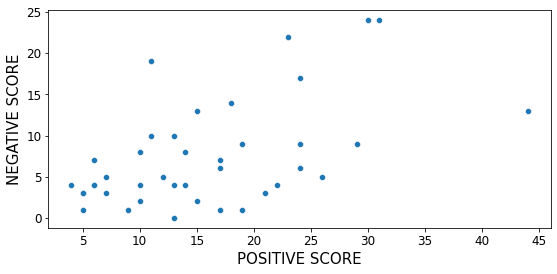

In [122]:
plt.figure(figsize=(9,4))
plt.xlabel("", fontdict={'size':15})
plt.ylabel("", fontdict={'size':15})
sns.scatterplot(x=df_["POSITIVE SCORE"], y=df_["NEGATIVE SCORE"], marker="o", ci=False)
plt.xticks(size=12)
plt.yticks(size=12);

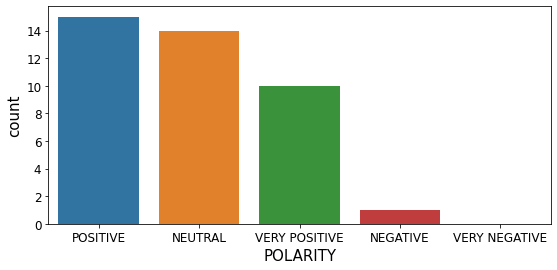

In [123]:
plt.figure(figsize=(9,4))
plt.xlabel("", fontdict={'size':15})
plt.ylabel("", fontdict={'size':15})
sns.countplot(x=df_["POLARITY"], order=list(df_["POLARITY"].value_counts().index))
plt.xticks(size=12)
plt.yticks(size=12);